<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202411/t44_aula5_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# 0. Carga de bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [121]:
# 1. Carga de dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv')

<Axes: xlabel='wt', ylabel='mpg'>

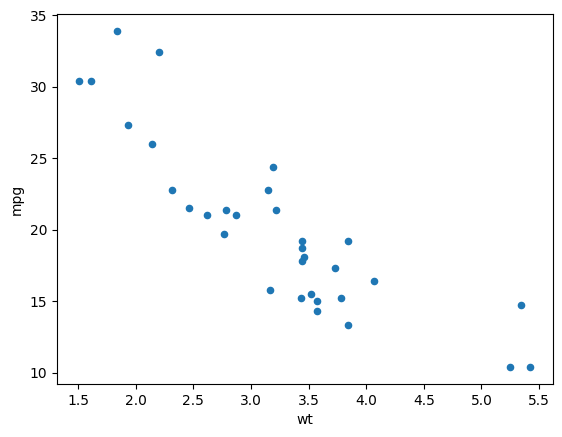

In [122]:
# 2. Análise descritiva
df.plot.scatter(x='wt', y='mpg')

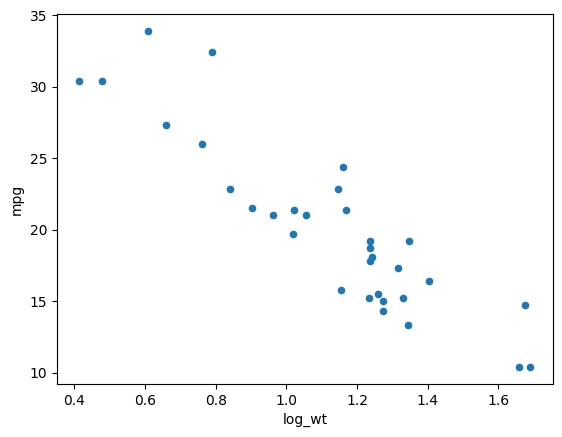

In [123]:
# Transformação de variáveis

# Transf. Log.
df['log_wt'] = np.log(df['wt'])

df.plot.scatter(x='log_wt', y='mpg')

# Transf. polinomial
poly = pp.PolynomialFeatures(17) # O parâmetro é o grau do polinômio

In [124]:
# Cálculo das correlações lineares - Matriz Correlação
dfn = df.select_dtypes(include=[np.number])
dfn.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,log_wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.900081
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.801618
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.863715
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.663691
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.731244
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,0.978822
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.180540
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.564760
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,-0.721678
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,-0.584099


In [125]:
# 3. Separação Treino e Teste
#x_treino, x_teste, y_treino, y_teste = train_test_split(df[['log_wt']], df['mpg'], test_size=0.25, random_state=33)
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=33)

# Aplicar transformação linear
x_treino = poly.fit_transform(x_treino)
x_teste = poly.fit_transform(x_teste)

In [126]:
# 4. Modelo de regressão linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)

# R2
print(mod.score(x_treino, y_treino))

0.9479097907454342


In [127]:
# 5 Erro de previsão
y_prev = mod.predict(x_teste)

print(mean_squared_error(y_teste, y_prev))

63133.54978237757


### Teoria das Probabilidades

In [131]:
dfTit = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv")

<Axes: xlabel='Age', ylabel='Survived'>

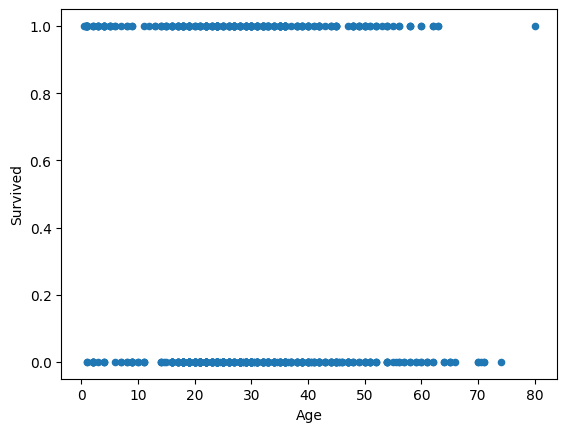

In [132]:
dfTit.plot.scatter(x='Age', y='Survived')

In [139]:
# Matriz Contingência
pd.crosstab(dfTit['Sex'], dfTit['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [138]:
342/891

0.3838383838383838